In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

In [3]:
X = np.load("../malaria/x_values.npy")
y = np.load("../malaria/y_values.npy")

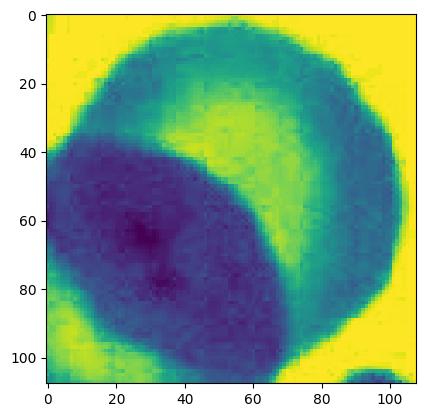

In [72]:
plt.imshow(X[500])

In [ ]:
#convert y into OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(y.reshape(-1,1))

In [5]:
y_encoded = ohe.transform(y.reshape(-1,1))# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")


The categories detected by the OneHotEncoder are [array(['difficult', 'gametocyte', 'leukocyte', 'red blood cell', 'ring',
       'schizont', 'trophozoite'], dtype='<U14')]


In [6]:
y_encoded_df=pd.DataFrame(y_encoded, columns = ohe.get_feature_names_out())

In [7]:
y_encoded_df

,x0_difficult,x0_gametocyte,x0_leukocyte,x0_red blood cell,x0_ring,x0_schizont,x0_trophozoite
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
y_encoded.shape

(1000, 7)

# Balancing the Datasets

In [10]:
from sklearn.utils import class_weight

{'x0_difficult': 5.0,
 'x0_gametocyte': 3.0,
 'x0_leukocyte': 2.0,
 'x0_red blood cell': 967.0,
 'x0_ring': 5.0,
 'x0_schizont': 2.0,
 'x0_trophozoite': 16.0}

In [11]:
cw = y_encoded_df.sum().to_dict()
cw

{'x0_difficult': 5.0,
 'x0_gametocyte': 3.0,
 'x0_leukocyte': 2.0,
 'x0_red blood cell': 967.0,
 'x0_ring': 5.0,
 'x0_schizont': 2.0,
 'x0_trophozoite': 16.0}

In [28]:
(np.unique(y_encoded, axis = 0))

array([[0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.]])

In [44]:
set(np.unique(y_encoded, axis =0))

TypeError: unhashable type: 'numpy.ndarray'

In [56]:
cwv = class_weight.compute_class_weight('balanced', 
                            classes = np.unique(y),
                            y=y)

In [57]:
z = zip([int(i) for i in (np.arange(0,7))], 
            cwv)
np.unique(y_encoded)
[int(i) for i in (np.arange(0,7))]
weighting = dict(z)
weighting


{0: 28.571428571428573,
 1: 47.61904761904762,
 2: 71.42857142857143,
 3: 0.14773230905599055,
 4: 28.571428571428573,
 5: 71.42857142857143,
 6: 8.928571428571429}

In [58]:
X_expanded = np.expand_dims(X,axis=3)
image_shape = (X_expanded.shape[1], X_expanded.shape[2], X_expanded.shape[3])

In [76]:
X_expanded=X_expanded/255 #.shape


In [60]:
y_encoded.shape

(1000, 7)

In [108]:
# from keras.layers import BatchNormalization

# ARCHITECTURE imports

import tensorflow as tf
import numpy as np
from tensorflow.keras import  Sequential, layers, regularizers

# from keras.layers import BatchNormalization

#### 1. ARCHITECTURE

model = Sequential()

model.add(layers.Conv2D(filters=36, kernel_size=(5,5), input_shape=image_shape, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Dropout(0.5))
# model.add(layers.Conv2D(filters=20, kernel_size=(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# model.add(layers.Conv2D(filters=10, kernel_size=(2,2), activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(layers.Conv2D(filters=20, kernel_size=(2,2), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))

#  model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

# Dropouts reduce overfitting by randomly turning neurons off during training.

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
# binary = sigmoid
model.add(layers.Dense(7, activation='softmax'))

# COMPILATION imports

from tensorflow.keras import optimizers, callbacks

#### 2. COMPILATION

# adam = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
# adam = optimizers.Adam(learning_rate=0.1)
adam = optimizers.Adam()

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 104, 104, 36)      936       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 52, 52, 36)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 52, 52, 36)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 51, 51, 20)        2900      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 25, 25, 20)       0         
 g2D)                                                            
                                                                 
 dense_32 (Dense)            (None, 25, 25, 64)      

In [109]:
# FIT imports

from tensorflow.keras import callbacks

#### 3. FIT

es = callbacks.EarlyStopping(patience=15, restore_best_weights=True)

history = model.fit(X_expanded, y_encoded,
          batch_size=32, # Batch size -too small--> no generalization
          epochs=100,    #            -too large--> slow computations
          validation_split=0.2,
          callbacks=[es],
          class_weight = weighting,
          verbose=1)


Epoch 1/100
25/25 [==============================] - 2s 70ms/step - loss: 2.9113 - accuracy: 0.3237 - val_loss: 1.9279 - val_accuracy: 0.9700
Epoch 2/100
25/25 [==============================] - 2s 65ms/step - loss: 2.0145 - accuracy: 0.0737 - val_loss: 1.9439 - val_accuracy: 0.1200
Epoch 3/100
25/25 [==============================] - 2s 66ms/step - loss: 1.9614 - accuracy: 0.0063 - val_loss: 1.9571 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 2s 65ms/step - loss: 1.9578 - accuracy: 0.0063 - val_loss: 1.9492 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 2s 67ms/step - loss: 1.9037 - accuracy: 0.0063 - val_loss: 1.9449 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 2s 64ms/step - loss: 1.8410 - accuracy: 0.1363 - val_loss: 1.9756 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 2s 65ms/step - loss: 1.7103 - accuracy: 0.1750 - val_loss: 1.9656 - val_accurac

In [97]:
from matplotlib import colors 
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color='b', label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color='r', label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

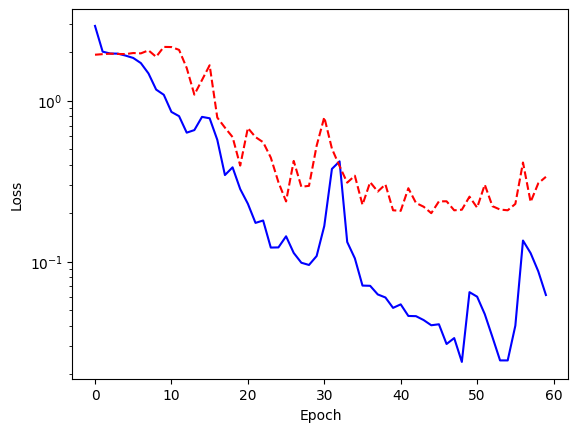

In [110]:
plot_loss(history,"first run",'b')

In [120]:
min(history.history['loss'])

0.023768816143274307

In [122]:
len(history.history['loss'])

60

In [ ]:
#